In [30]:
import sys
import os
#import json
#import requests
import wget  # requires pip install wget
#import zipfile
import numpy as np
import matplotlib.pyplot as plt


In [3]:
fpartition = open('partition_function.html',"r")
fpartitionlines = fpartition.readlines()
fpartition.close()

In [25]:
if not os.path.isdir('catalog_partitioncorrection'):
    os.mkdir('catalog_partitioncorrection')

In [ ]:
for fpartitionline in fpartitionlines[15:]:
    if "<" not in fpartitionline:
        fpartitioncode = fpartitionline[0:6].replace("  ","00").replace(" ","0")
        print(fpartitioncode)
        downloadedfilename=wget.download(
            'https://cdms.astro.uni-koeln.de/cgi-bin/cdmsinfo?file=e%s.cat' %fpartitioncode, 
            out='./catalog_partitioncorrection/e%s.cat'%fpartitioncode
        )

In [14]:
for efiles in os.listdir(./catalog_partitioncorrection/):
    efile = open('./catalog_partitioncorrection/%s' % efiles)
    for lines in efile.readlines:
        

['  3501 HD                           20       1.2115       0.9135       0.7026       0.5876       0.4322       0.1964       0.0406       0.0014       0.0000       0.0000       0.0000\n',
 '  4501 H2D+                        196          ---       2.2148       1.8834       1.6986       1.4401       0.9882       0.4919       0.0846       0.0016       0.0000       0.0000\n',
 '  5501 HD2+                        163          ---          ---       1.9098       1.7243       1.4652       1.0326       0.6405       0.3772       0.3049       0.3011       0.3010\n',
 '  5502 HeH+                         18       1.3320       1.0335       0.8192       0.7015       0.5406       0.2874       0.0904       0.0075       0.0000          ---          ---\n',
 ' 12501 C-atom                        2       0.9359       0.9177       0.8939       0.8744       0.8363       0.7295       0.5494       0.3075       0.0962       0.0114       0.0002\n',
 ' 12502 BH                           15          ---       

['300.0' '290.0' '280.0' '270.0' '260.0' '250.0' '240.0' '230.0' '220.0'
 '210.0' '200.0' '190.0' '180.0' '170.0' '160.0' '150.0' '140.0' '130.0'
 '120.0' '110.0' '100.0' '090.0' '080.0' '070.0' '060.0' '050.0' '040.0'
 '030.0' '020.0' '010.0']
['12789.40' '11864.67' '10992.21' '10159.07' '9364.74' '8617.18' '7913.78'
 '7237.75' '6610.24' '6009.28' '5447.00' '4916.46' '4417.23' '3952.81'
 '3517.84' '3108.76' '2731.61' '2382.27' '2060.03' '1764.11' '1493.58'
 '1247.44' '1024.53' '823.61' '643.39' '482.67' '340.63' '217.37' '114.73'
 '37.54']


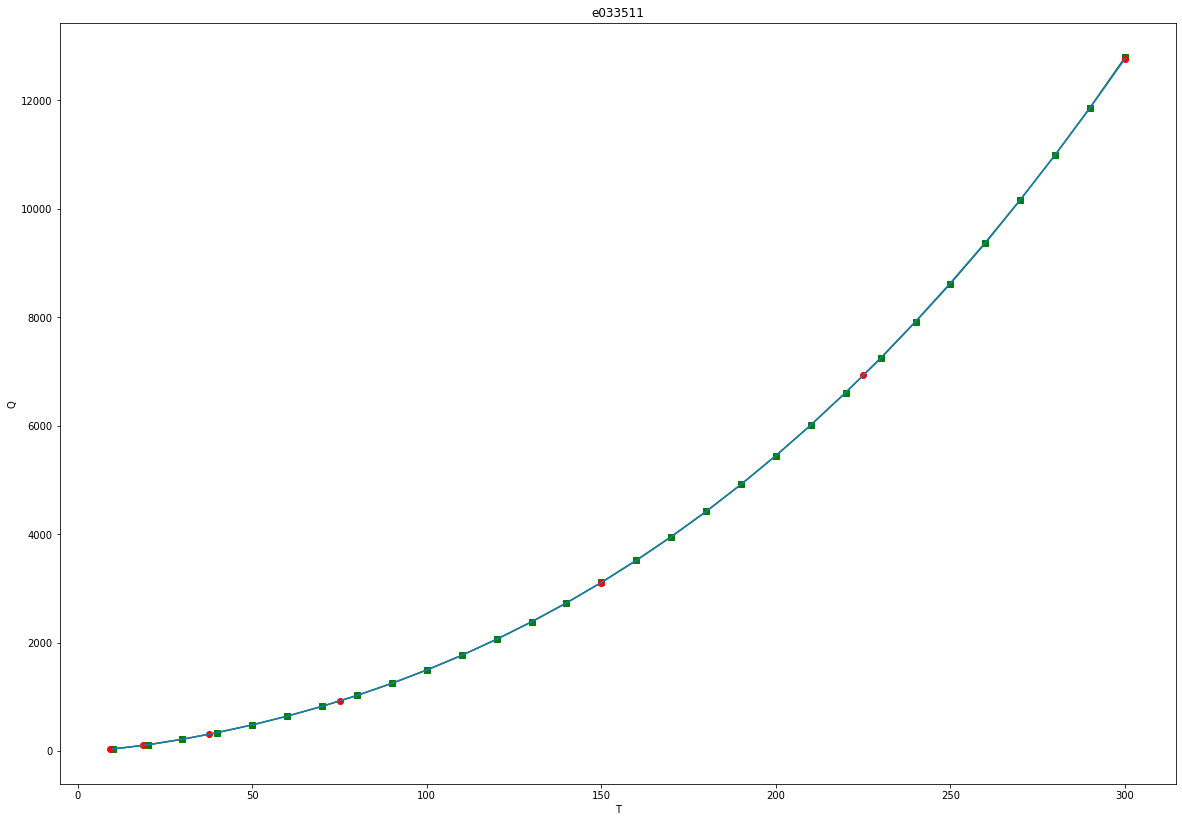

In [89]:
x_new=np.array([300.0,225.0,150.0,75.0,37.5,18.75,9.375])
x_new=np.log10(x_new)

# LOOP HERE
tag = 'e033511.cat'
tag = tag.replace(".cat","")
efile = open('./catalog_partitioncorrection/%s.cat' %tag)

x = []
y = []
for lines in efile.readlines():
    if "Q(" in lines:
        x =np.append(x,lines.split("Q(")[1].split(")")[0])
        y =np.append(y,lines.split("right>")[1].split("<")[0])

print(x)
print(y)

x = np.log10(x.astype(np.float))
y = np.log10(y.astype(np.float))    
fit = np.polyfit(x, y ,5)
line = np.poly1d(fit)
y_new = line(x_new)
plt.figure(figsize=[20,14])
plt.plot(x, y, "sg-", x_new, y_new, "or")
plt.plot(x, line(x))
plt.xlabel("log10(T)")
plt.ylabel("log10(Q)")
plt.title("%s" %tag)
plt.savefig('./catalog_partitioncorrection/%s_part_log.png' %tag)
#print(10**y_new)
#print((10**y_new-10**y)/10**y*100)
plt.gcf().clear()
plt.plot(10**x, 10**y, "sg-", 10**x_new, 10**y_new, "or");
plt.plot(10**x, 10**line(x))
plt.xlabel("T")
plt.ylabel("Q")
plt.title("%s" %tag)
plt.savefig('./catalog_partitioncorrection/%s_part_lin.png' %tag)


In [90]:
10**x_new

array([300.   , 225.   , 150.   ,  75.   ,  37.5  ,  18.75 ,   9.375])

In [91]:
y_new

array([4.10599529, 3.84042345, 3.49225409, 2.96475771, 2.48831665,
       2.01501145, 1.52969983])

In [92]:
10**4.10599529

12764.249656831456

In [51]:
10**4.1069

12790.867496387487

In [93]:
12790/12764

1.0020369790034471

In [59]:
line

poly1d([-0.15340873,  1.37366194, -4.58577918,  7.21921503, -3.80622829,
        1.5270067 ])

In [60]:
fit

array([-0.15340873,  1.37366194, -4.58577918,  7.21921503, -3.80622829,
        1.5270067 ])